In [1]:
# 대선자료 시각화
import pandas as pd

In [2]:
# Data 불러오기
election = pd.read_csv("../Data/election_2022.csv")
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
0,서울특별시,종로구,129968,100629,46130,49172,3115
1,서울특별시,중구,111448,84998,38244,42906,2310
2,서울특별시,용산구,199077,152068,60063,85047,4374
3,서울특별시,성동구,252087,197240,84411,103880,5365
4,서울특별시,광진구,303582,235471,109922,113733,7072


In [3]:
election.tail()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
243,경상남도,산청군,31645,24913,7125,16607,464
244,경상남도,거창군,53049,41399,11963,27254,895
245,경상남도,합천군,39768,31270,6911,22742,511
246,제주특별자치도,제주시,408552,296826,157695,122084,10007
247,제주특별자치도,서귀포시,155802,112823,55435,50930,3591


In [4]:
# 기본 통계량 확인하기 : 갯수, 표준편차, 1~4사분위수, 최대값 등등
election.describe()

,선거인수,투표수,이재명,윤석열,심상정
count,248.000000,248.000000,248.000000,248.000000,248.000000
mean,176570.540323,136147.838710,64479.104839,65566.290323,3215.532258
std,141049.731983,108569.706317,56875.864428,56766.365763,2893.695797
min,8141.000000,6653.000000,1590.000000,2052.000000,109.000000
25%,47671.500000,39215.750000,17363.000000,18223.000000,709.000000
50%,154353.500000,114654.000000,48797.000000,50341.000000,2617.500000
75%,265099.250000,204189.250000,99830.750000,101949.750000,5041.000000
max,703896.000000,542027.000000,285227.000000,275155.000000,13249.000000


In [5]:
#컬럼명 확인하기
election.columns

Index(['광역시도', '시군구', '선거인수', '투표수', '이재명', '윤석열', '심상정'], dtype='object')

In [6]:
# dimenstion 확인하기
election.shape

(248, 7)

In [7]:
# 컬럼별 자료형 확인하기
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   광역시도    248 non-null    object
 1   시군구     248 non-null    object
 2   선거인수    248 non-null    int64 
 3   투표수     248 non-null    int64 
 4   이재명     248 non-null    int64 
 5   윤석열     248 non-null    int64 
 6   심상정     248 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 13.7+ KB


In [8]:
# any()는 하나라도 있으면 True
election.isnull().any()

광역시도    False
시군구     False
선거인수    False
투표수     False
이재명     False
윤석열     False
심상정     False
dtype: bool

In [9]:
#election['electionSum'] = election.loc[:,'이재명':'심상정'].apply(sum,axis=1)
election['electionSum'] = election.iloc[:,4:7].sum(axis=1)
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417
1,서울특별시,중구,111448,84998,38244,42906,2310,83460
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727


In [10]:
election['electionRatio'] = round(election.electionSum /  election.loc[:,'투표수'] * 100, 2)
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
1,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99


In [11]:
election.to_csv("../Data/election_2022_1st.csv", index=False, encoding='utf-8')

---
### 광역시별 투표율을 Pie Chart로 표현하기

In [12]:
# pivot을 이용하여 광역시별 투표수를 합계로 그룹화하여 집계한다.

elec_sum = election.pivot_table('투표수', index = '광역시도',aggfunc= sum) # 쌤꺼
election_pie = election.groupby('광역시도').sum() # 내꺼

In [13]:
# 투표수별 순차를 내림차순으로 정렬
elec_sum_order = elec_sum.sort_values(by = '투표수',ascending=False) # 쌤꺼
election_pie= election_pie.sort_values('투표수',ascending=False) # 내꺼


In [14]:
import matplotlib.pyplot as plt

In [15]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [16]:
plt.style.use('ggplot')

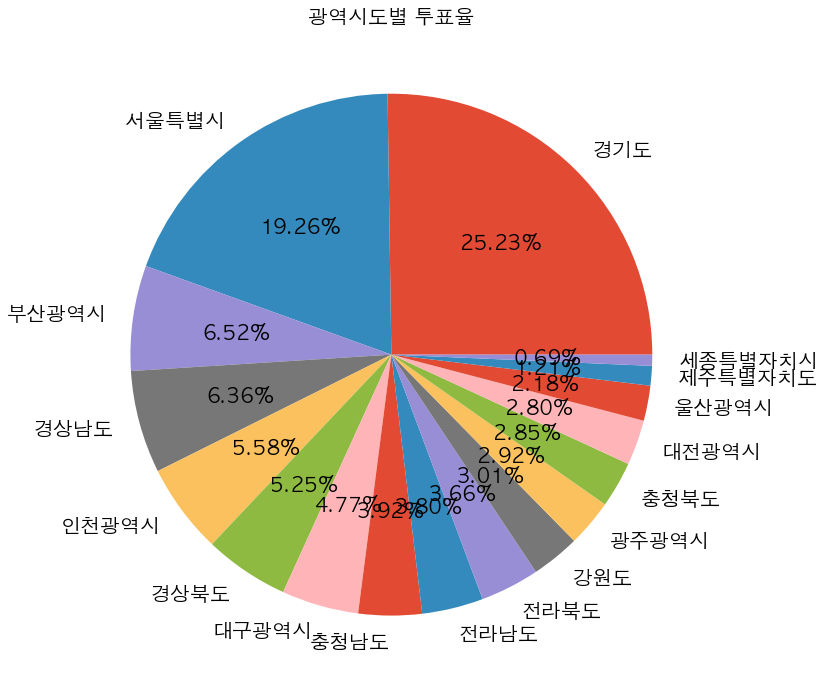

In [17]:
# 쌤꺼
data = elec_sum_order['투표수']
categories = list(elec_sum_order.index)

plt.rcParams['figure.figsize'] = (12,12)
plt.rcParams['font.size'] = 20

plt.pie( 
    data,
    labels = categories,
    autopct="%.2f%%"
    
)

plt.title('광역시도별 투표율',fontsize = 20)
plt.show()

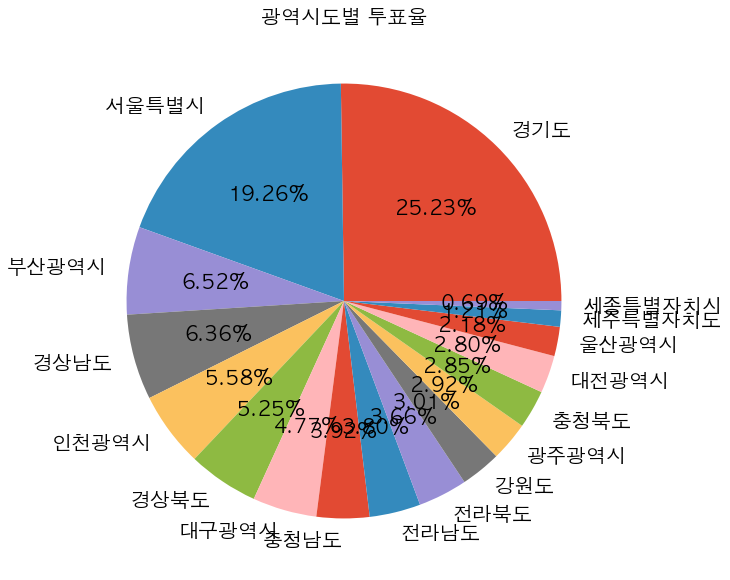

In [18]:
# 내꺼

election_pie.투표수.plot(
    figsize = (10,10),
    kind= 'pie',
    autopct = '%.2f%%',
    ylabel = '',


)

plt.title('광역시도별 투표율',size = 20)

plt.show()

In [19]:
# 윤석열 후보이ㅡ 광역시도별 득표율
yoon_sido = election.pivot_table('윤석열',index= '광역시도',aggfunc=sum)
yoon_sido = yoon_sido.sort_values(by='윤석열',ascending=False)
yoon_sido.head()

,윤석열
광역시도,
경기도,3859666
서울특별시,3255747
경상북도,1278922
부산광역시,1270072
경상남도,1237346


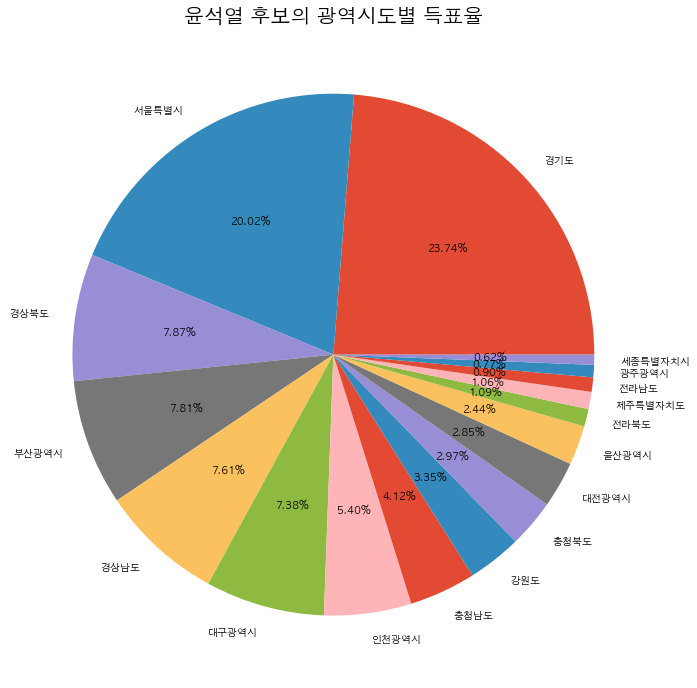

In [20]:
plt.rcParams['figure.figsize'] = (12,12)
plt.rcParams['font.size'] = 10

plt.pie( 
    yoon_sido.윤석열,
    labels = yoon_sido.index,
    autopct="%.2f%%",
)

plt.title('윤석열 후보의 광역시도별 득표율',fontsize = 20)

plt.show()

In [21]:
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
1,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99


In [22]:
yoon_gu = election[election.광역시도 == '서울특별시'].sort_values('윤석열',ascending=False)
yoon_gu = yoon_gu.iloc[:,[list(yoon_gu.columns).index('시군구'),list(yoon_gu.columns).index('윤석열')]]
yoon_gu


,시군구,윤석열
23,송파구,255166
22,강남구,235897
15,강서구,181510
21,서초구,179472
10,노원구,163340
24,강동구,160593
20,관악구,151944
14,양천구,149780
11,은평구,140666
19,동작구,135733


In [23]:
yoon_gu.head()

,시군구,윤석열
23,송파구,255166
22,강남구,235897
15,강서구,181510
21,서초구,179472
10,노원구,163340


In [24]:
yoon_gu = yoon_gu[:5].append(yoon_gu[5:].sum(axis=0),ignore_index = True)
#pd.concat([yoon_gu[:5], pd.DataFrame([yoon_gu[5:].sum(axis=0)])],axis=0)

In [25]:
yoon_gu = yoon_gu[:5].append(yoon_gu[5:].sum(axis=0),ignore_index = True)
yoon_gu.iloc[5,0] = '기타'
yoon_gu

,시군구,윤석열
0,송파구,255166
1,강남구,235897
2,강서구,181510
3,서초구,179472
4,노원구,163340
5,기타,2240362


In [26]:
yoon_gu.set_index('시군구',inplace=True)

In [27]:
plt.style.use('ggplot')

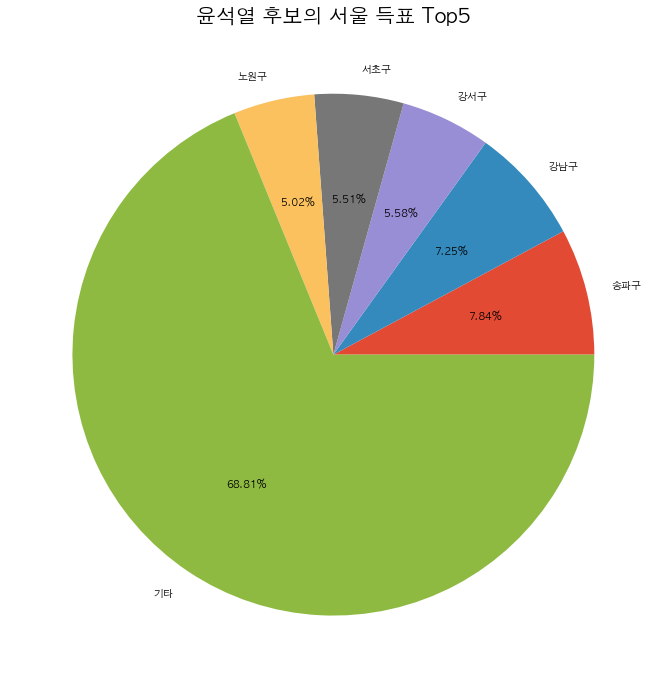

In [28]:
plt.rcParams['figure.figsize'] = (12,12)
plt.rcParams['font.size'] = 10

plt.pie( 
    yoon_gu.윤석열,
    labels = yoon_gu.index,
    autopct="%.2f%%",
)

plt.title('윤석열 후보의 서울 득표 Top5',fontsize = 20)

plt.show()

# 대선주자 출생지별 득표율 분석
- 윤석열 후보의 출생지는 서울 특별시 성북구

In [30]:
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
1,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99


In [ ]:
pd.DataFrame()

205    28.863955
dtype: float64

In [40]:
temp =  election[(election.시군구 == '성북구')]
temp

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
7,서울특별시,성북구,375880,292187,142702,135044,8952,286698,98.12


In [51]:
temp = temp.loc[:,'이재명':'심상정'] / temp.투표수.values[0] * 100
temp['기타'] = 100 - temp.loc[:,'이재명':'심상정'].sum(axis=1)
temp = temp.T 
temp

In [66]:
plt.style.use('default')
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [99]:
temp.columns =  ['득표율']

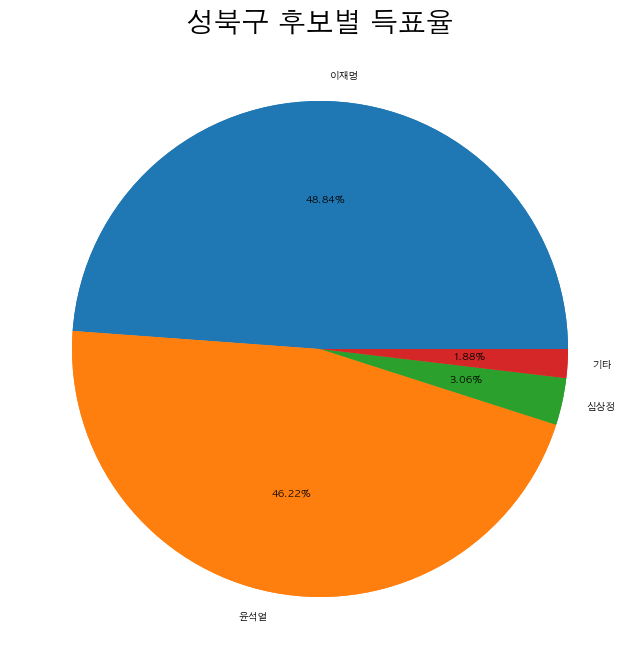

In [103]:
plt.rcParams['font.size'] = 7
plt.rcParams['figure.figsize'] = (8,10)
temp.득표율.plot(
    kind = 'pie',
    ylabel = '',
    autopct = '%.2f%%',
)



plt.title('성북구 후보별 득표율',size = 20)

plt.show()

In [106]:
temp.index

Index(['이재명', '윤석열', '심상정', '기타'], dtype='object')

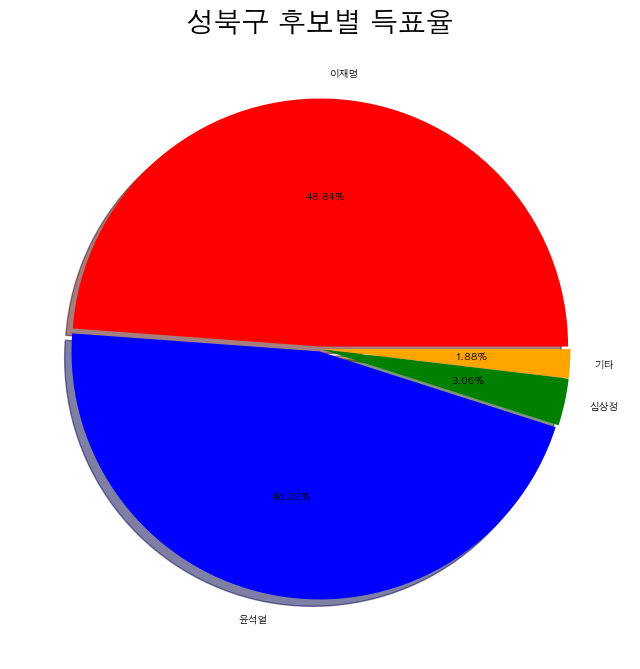

In [133]:
plt.rcParams['font.size'] = 7
plt.rcParams['figure.figsize'] = (8,10)
plt.pie(
    temp.득표율,
    labels = temp.index,
    autopct= '%.2f%%',
    colors = ['r','b',"g",'Orange'],
    explode= [0.01] * 4,
    shadow=True
    

)

plt.title('성북구 후보별 득표율',size = 20)

plt.show()



In [156]:
pob_윤석열 = election[election['시군구'] == '성북구']
pob_윤석열

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
7,서울특별시,성북구,375880,292187,142702,135044,8952,286698,98.12


In [157]:
pob_윤석열_data = \
    pd.Series([int(pob_윤석열['윤석열']),int(pob_윤석열['이재명']),int(pob_윤석열['심상정'])]).\
        append(pob_윤석열['투표수'] - pob_윤석열['electionSum']).reset_index(drop = True)
pob_윤석열_data

0    135044
1    142702
2      8952
3      5489
dtype: int64

In [159]:
pob_윤석열_data.index = ['윤석열','이재명','심상정','기타']
pob_윤석열_data


윤석열    135044
이재명    142702
심상정      8952
기타       5489
dtype: int64

In [166]:
pd.DataFrame([pob_윤석열_data,pob_윤석열_data,pob_윤석열_data,pob_윤석열_data])

,윤석열,이재명,심상정,기타
0,135044,142702,8952,5489
1,135044,142702,8952,5489
2,135044,142702,8952,5489
3,135044,142702,8952,5489


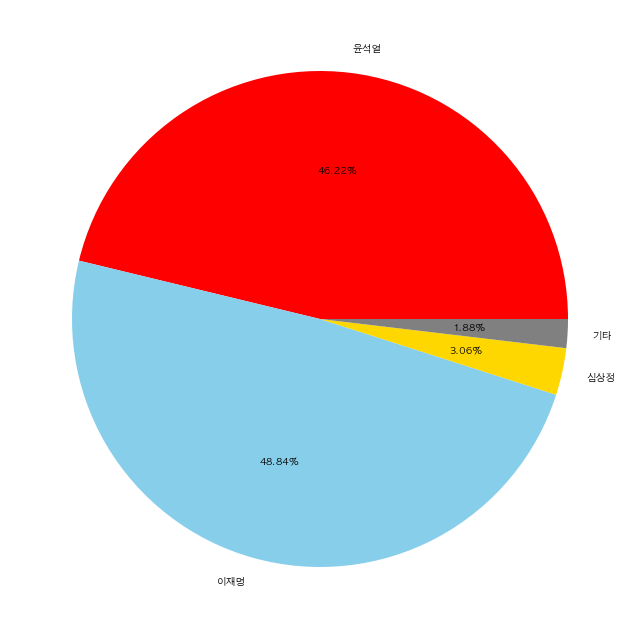

In [162]:
plt.pie(
    pob_윤석열_data,
    labels = pob_윤석열_data.index,
    colors = ['r','#87CEEB','gold','gray'],
    autopct= '%.2f%%'
)
plt.show()


In [139]:
pob_윤석열['윤석열']

7    135044
Name: 윤석열, dtype: int64

---
### 투표수가 가장 많은 4지역(광역시도)의 각 후보별 득표수를 막대그래프로 표현하기

In [183]:
temp = election.pivot_table(['투표수','이재명','심상정','윤석열'],index='광역시도',aggfunc=sum)
temp.sort_values('투표수',ascending=False,inplace=True)
temp.head(4)

,심상정,윤석열,이재명,투표수
광역시도,,,,
경기도,201113,3859666,4297931,8518854
서울특별시,180324,3255747,2944981,6501831
부산광역시,47541,1270072,831896,2200224
경상남도,52591,1237346,794130,2146882


In [191]:
temp = temp.iloc[:4,:3]
temp.sort_values('서울특별시' ,axis=1,ascending=False, inplace=True)
temp.head()

,윤석열,이재명,심상정
광역시도,,,
경기도,3859666,4297931,201113
서울특별시,3255747,2944981,180324
부산광역시,1270072,831896,47541
경상남도,1237346,794130,52591


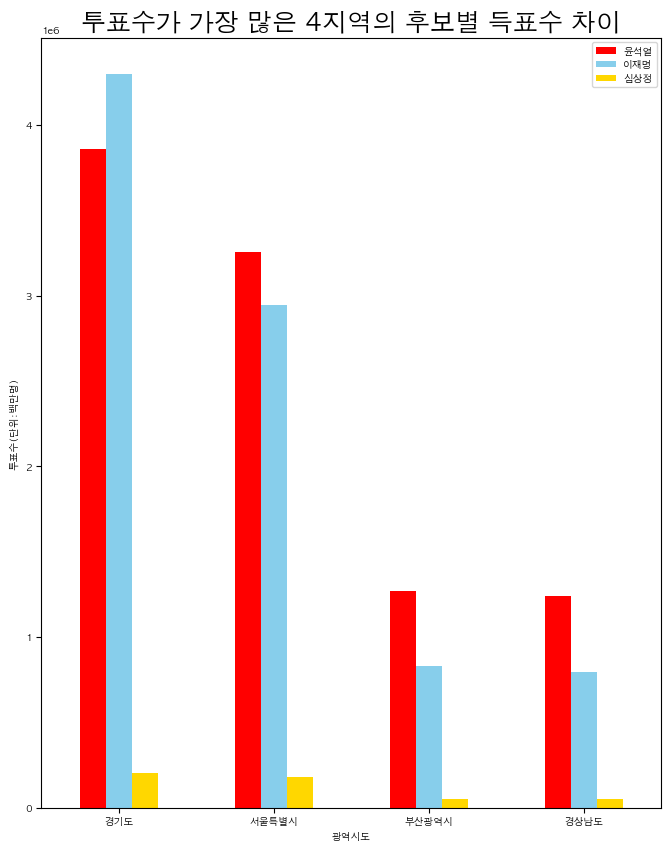

In [227]:
temp.plot(
    kind = 'bar',
    color = ['red','skyblue','gold'],
    ylabel = '투표수(단위:백만명)',

    
)

plt.xticks(rotation = 0)
plt.yticks(range(0,5000000,1000000))
# plt.ylim((1000000, 5000000))
# plt.yscale('linear')
plt.title('투표수가 가장 많은 4지역의 후보별 득표수 차이',size = 18)
plt.show()

---
### 투표수가 높은 5군데 시군구의 후보별 득표수

In [318]:
temp = election.loc[:,['광역시도','시군구','투표수','윤석열','이재명','심상정']]
temp = temp.sort_values('투표수',ascending=False).reset_index(drop=True)
temp = temp.loc[:4,['광역시도','시군구','윤석열','이재명','심상정']]


temp

,광역시도,시군구,윤석열,이재명,심상정
0,경기도,화성시,236055,283324,12955
1,경기도,부천시,224331,285227,13249
2,경기도,남양주시,203075,239179,10089
3,서울특별시,송파구,255166,180490,10652
4,서울특별시,강서구,181510,190000,11100


In [320]:
temp['시군'] = temp.광역시도 +" "+ temp.시군구
temp.set_index('시군',inplace=True)
temp = temp.iloc[:,2:]


In [321]:
sns.set_style('whitegrid')

In [322]:

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

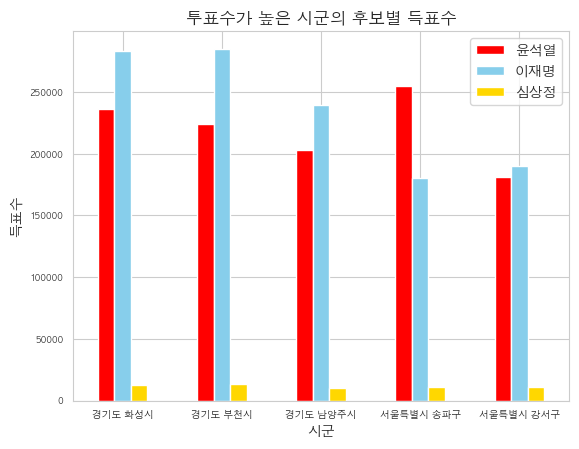

In [327]:
temp.plot(
    kind = 'bar',
    color = ['red','skyblue','gold'],
    ylabel = '득표수',
)
plt.title('투표수가 높은 시군의 후보별 득표수')
plt.yticks(size = 6)
plt.xticks(rotation = 0,size = 7)
plt.show()

In [370]:
elec_top5 = \
    election.sort_values(by='투표수',ascending=False)[:5][['윤석열','이재명','심상정']].reset_index(drop=True)
elec_top5


,윤석열,이재명,심상정
0,236055,283324,12955
1,224331,285227,13249
2,203075,239179,10089
3,255166,180490,10652
4,181510,190000,11100


In [373]:
city = \
    election.sort_values(by='투표수',ascending=False)[:5]['광역시도'] + " " + \
        election.sort_values(by='투표수',ascending=False)[:5]['시군구']
city

100      경기도 화성시
85       경기도 부천시
98      경기도 남양주시
23     서울특별시 송파구
15     서울특별시 강서구
dtype: object

In [374]:
elec_top5.index = city.reset_index(drop=True)
elec_top5

,윤석열,이재명,심상정
경기도 화성시,236055,283324,12955
경기도 부천시,224331,285227,13249
경기도 남양주시,203075,239179,10089
서울특별시 송파구,255166,180490,10652
서울특별시 강서구,181510,190000,11100


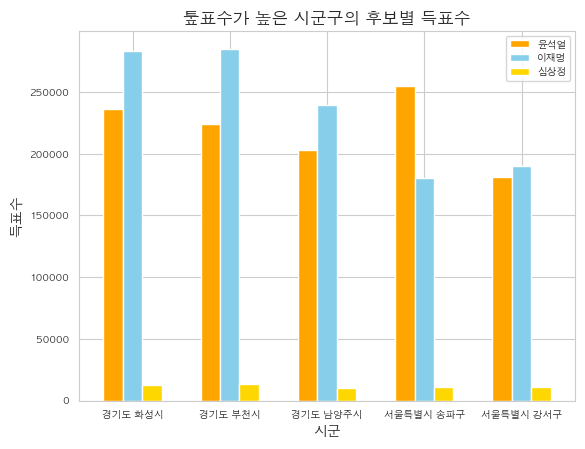

In [394]:
plt.rcParams['font.size'] = 7

elec_top5.plot.bar(
    rot = 0,
    color = ['orange','skyblue','gold'],
    width = 0.6,
)

plt.title('투표수가 높은 시군구의 후보별 득표수')
plt.xlabel('시군',size = 10)
plt.ylabel('득표수',size = 10)
plt.title('퉆표수가 높은 시군구의 후보별 득표수',size = 12)
# plt.grid() # grid 보여줌
plt.savefig('../Data/투표수가 높은 시군구의 후보별 득표수.png')


---
### 낙서장

In [328]:
import seaborn as sns

In [330]:
temp

,윤석열,이재명,심상정
시군,,,
경기도 화성시,236055,283324,12955
경기도 부천시,224331,285227,13249
경기도 남양주시,203075,239179,10089
서울특별시 송파구,255166,180490,10652
서울특별시 강서구,181510,190000,11100


In [354]:
temp2  = temp.reset_index()
temp2

,시군,윤석열,이재명,심상정
0,경기도 화성시,236055,283324,12955
1,경기도 부천시,224331,285227,13249
2,경기도 남양주시,203075,239179,10089
3,서울특별시 송파구,255166,180490,10652
4,서울특별시 강서구,181510,190000,11100


In [358]:
temp3 = temp.T.reset_index()
temp3

시군,index,경기도 화성시,경기도 부천시,경기도 남양주시,서울특별시 송파구,서울특별시 강서구
0,윤석열,236055,224331,203075,255166,181510
1,이재명,283324,285227,239179,180490,190000
2,심상정,12955,13249,10089,10652,11100
